<a href="https://colab.research.google.com/github/YeharaMewan/Prediction-of-compressive-strength-of-concrete/blob/main/Prediction%20of%20compressive%20strength%20of%20concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## **Prediction of compressive strength of concrete**


---
#### Student Name: Udawattha U.K.D.S.T
#### Registration Number:
---
#### Student Name: Mewan L.A.D.Y         
#### Registration Number:
---
In this project, we are going to analyze a dataset focused on **Prediction of compressive strength of concrete**. This project aims to predict the
compressive strength of concrete using regression-based machine learning models. Compressive strength is a critical measure of concrete's ability to withstand loads, essential for ensuring the structural integrity and safety of buildings and infrastructure. Using a dataset from the UCI Machine Learning Repository, we will analyze features such as the quantities of cement, water, and other mix components, along with the age of the concrete.

Data Source:  
- Phishing websites were collected from the Phishtank data archive (https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength), a free community site for phishing data.

## **Dataset Overview**  

**Dataset Characteristics:**  
- **Type:** Multivariate  
- **Associated Task:** Regression  
- **Feature Type:** Real  
- **Number of Instances:** 1030  
- **Number of Features:** 8 (input features) + 1 (target variable)  
- **Missing Values:** None  
---

## **Variables Description**  

| **Variable Name**         | **Role** | **Type**      | **Description**                          | **Units**    |  
|---------------------------|----------|---------------|------------------------------------------|--------------|  
| Cement                   | Feature  | Continuous    | Cement content in a mixture              | kg/m³        |  
| Blast Furnace Slag       | Feature  | Integer       | Quantity of blast furnace slag in a mixture | kg/m³      |  
| Fly Ash                  | Feature  | Continuous    | Amount of fly ash in a mixture           | kg/m³        |  
| Water                    | Feature  | Continuous    | Water content in a mixture               | kg/m³        |  
| Superplasticizer         | Feature  | Continuous    | Quantity of superplasticizer used        | kg/m³        |  
| Coarse Aggregate         | Feature  | Continuous    | Amount of coarse aggregate in a mixture  | kg/m³        |  
| Fine Aggregate           | Feature  | Continuous    | Fine aggregate content in a mixture      | kg/m³        |  
| Age                      | Feature  | Integer       | Age of the concrete sample (1 to 365 days) | days        |  
| Concrete Compressive Strength | Target   | Continuous    | Compressive strength of concrete         | MPa          |  

---


#Mount Google Drive

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries for Train test splite
from sklearn.model_selection import train_test_split, cross_val_score

# Import necessary libraries for Feature scaling
from sklearn.preprocessing import StandardScaler

# Import necessary libraries for linear regression and tuning
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import necessary libraries for Polynomial regression model and tuning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Import necessary libraries for SVM
from sklearn.svm import SVR

# Import necessary libraries for SVM RandomizedSearchCV tuning
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import uniform, randint

# Import necessary libraries for Random Forest Regressor and hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor

# Import necessary libraries for  learning curve
from sklearn.model_selection import learning_curve




#Load the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ml project/Concrete_Data.csv')

#Exploratory Data Analysis (EDA)

##Perform Basic Exploration

In [ ]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
 df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
print(df.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


## Correlation with features

In [ ]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

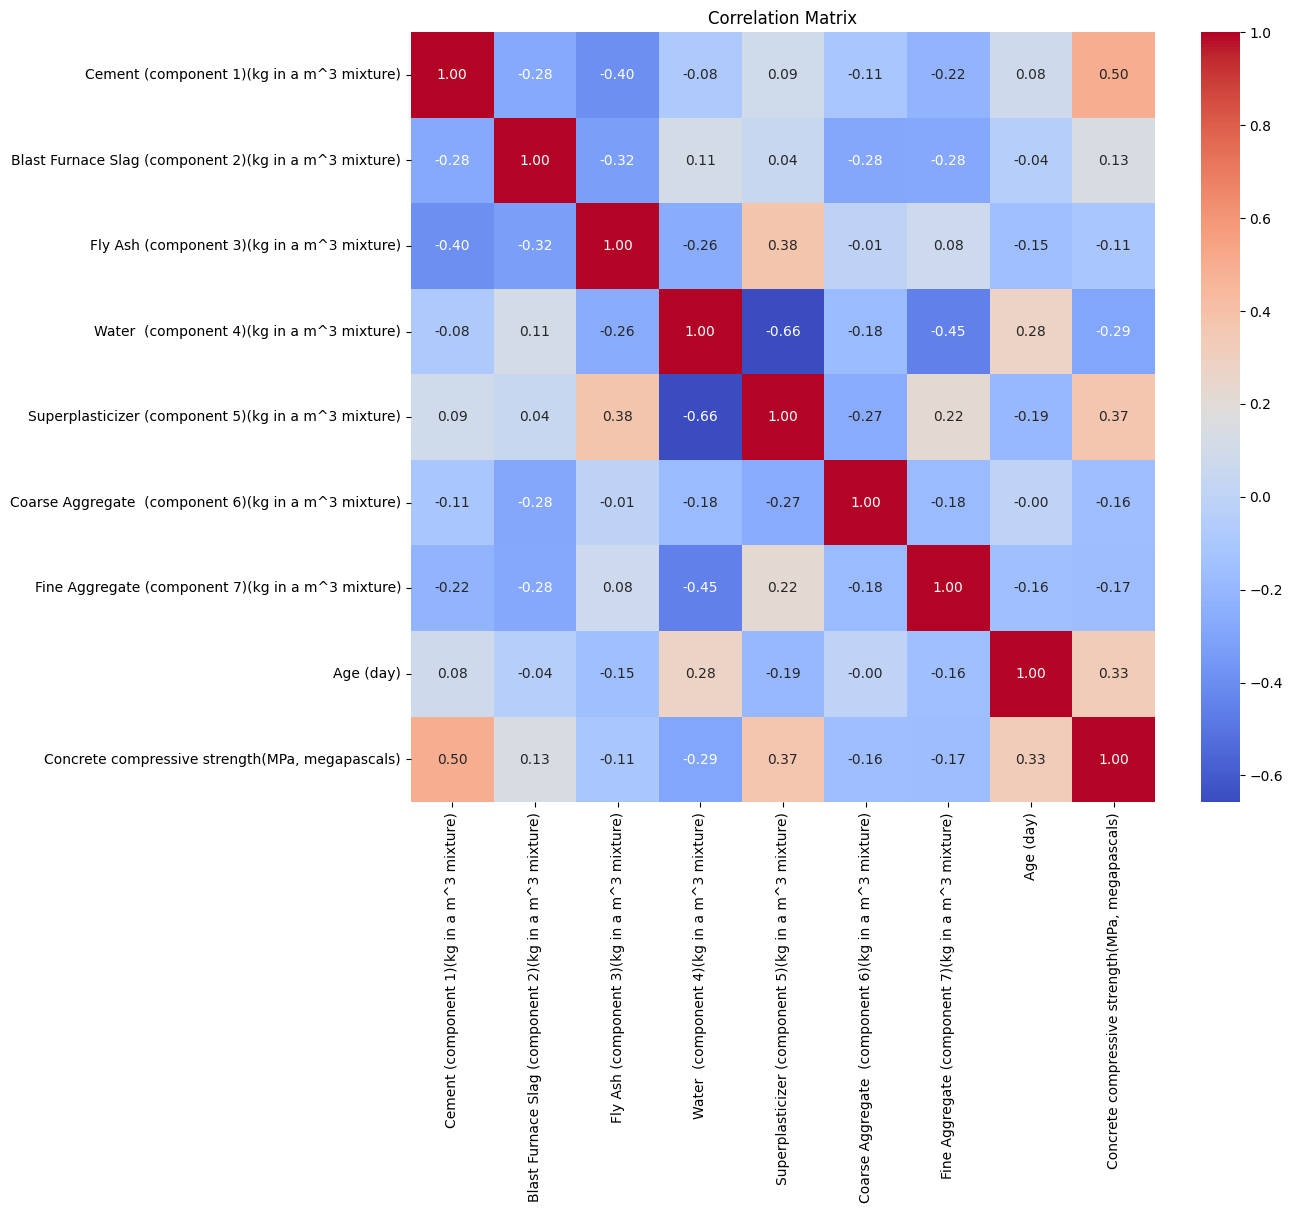

In [ ]:
# Visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Train Test Split data

In [ ]:
# Assuming the last column is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verifying the split
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (721, 8)
Test set size: (309, 8)


## Distribution of y_train test

Statistics of y_train:
count    721.000000
mean      36.152732
std       16.803538
min        2.330000
25%       23.890000
50%       35.080000
75%       46.250000
max       82.600000
Name: Concrete compressive strength(MPa, megapascals), dtype: float64


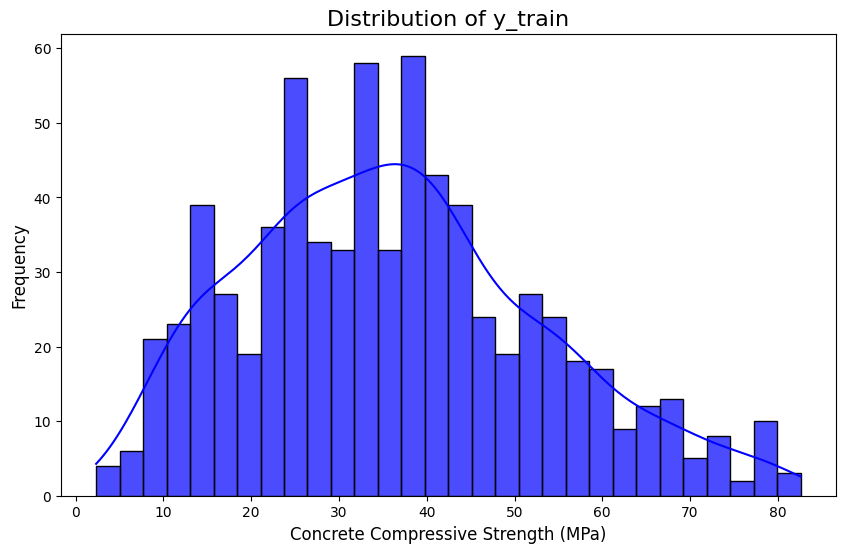

In [ ]:
# Check basic statistics for y_train
print("Statistics of y_train:")
print(y_train.describe())

# Plot the distribution of y_train
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of y_train', fontsize=16)
plt.xlabel('Concrete Compressive Strength (MPa)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


### Concatenate X_train and y_train

In [ ]:
# Concatenate X_train and y_train
train_combined = pd.concat([X_train, y_train], axis=1)


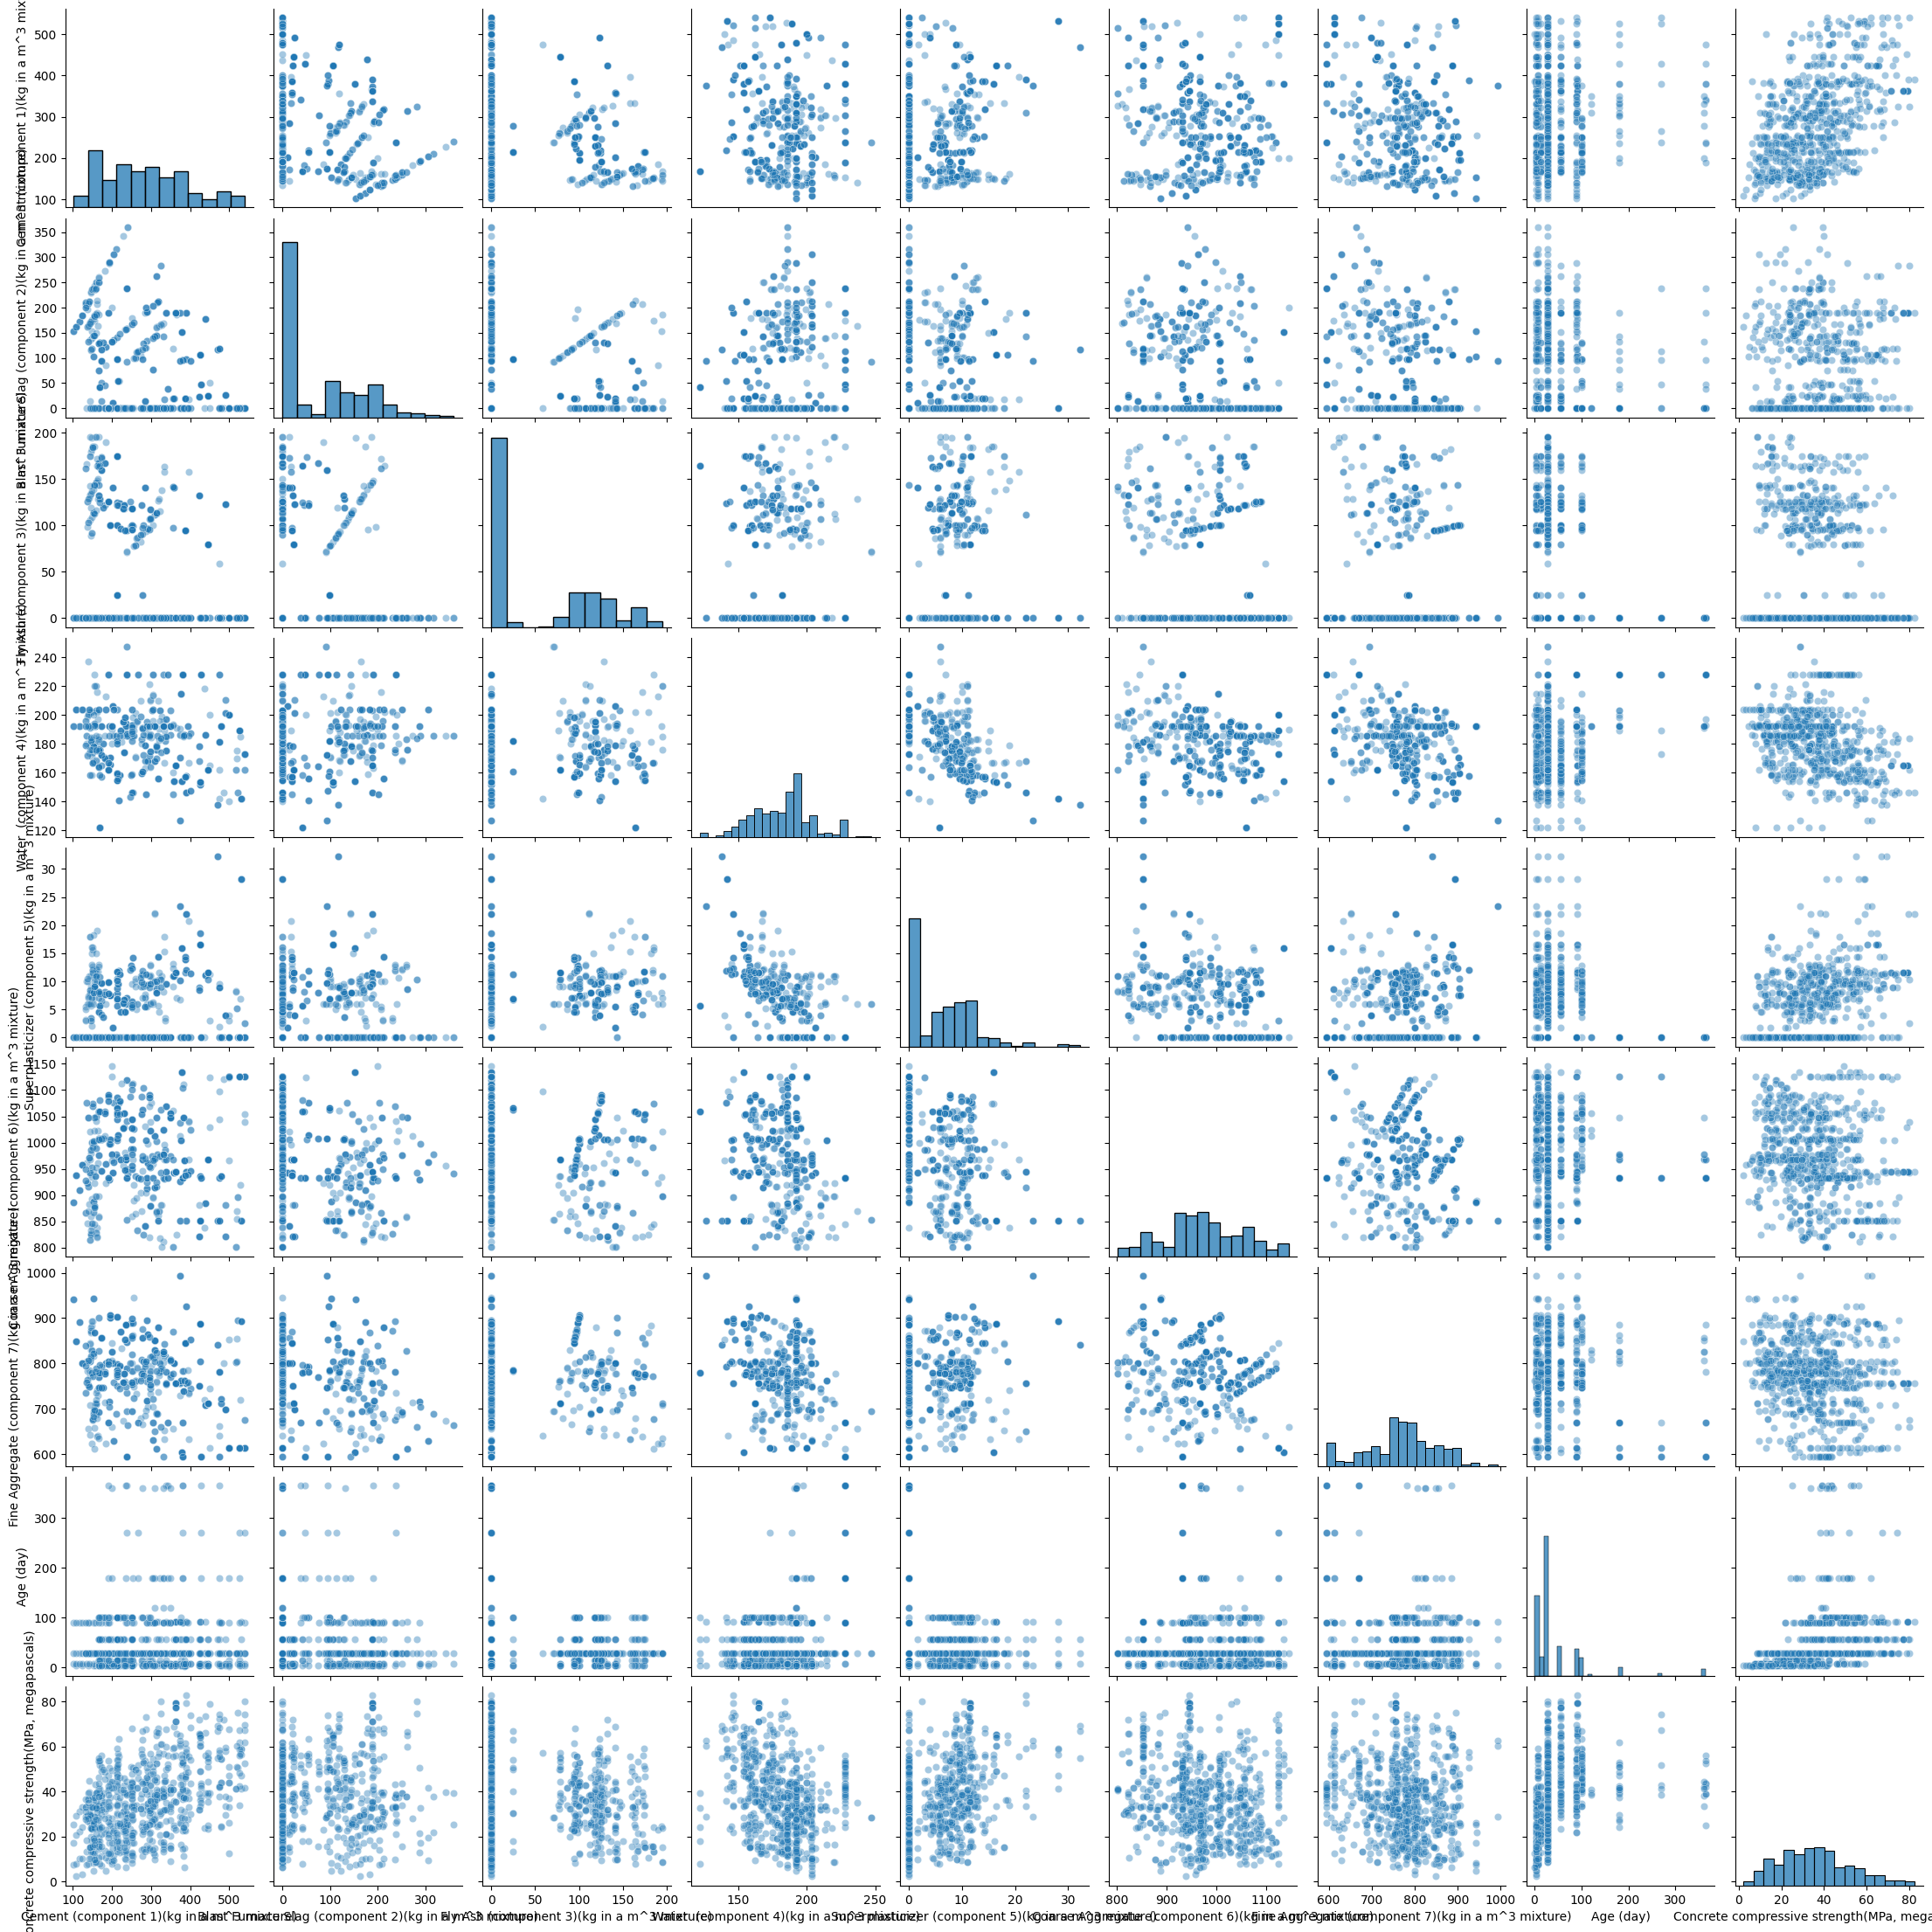

In [ ]:
sns.pairplot(train_combined,kind='scatter',plot_kws={'alpha':0.4})

#Check for null values in train and test data

In [ ]:
# Check for null values in X_train
print("Checking for null values in X_train:")
print(X_train.isnull().sum())

# Check for null values in y_train
print("\nChecking for null values in y_train:")
print(y_train.isnull().sum())


Checking for null values in X_train:
Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
dtype: int64

Checking for null values in y_train:
0


In [ ]:
# Check for null values in X_test
print("Checking for null values in X_test:")
print(X_test.isnull().sum())

# Check for null values in y_test
print("\nChecking for null values in y_test:")
print(y_test.isnull().sum())


Checking for null values in X_test:
Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
dtype: int64

Checking for null values in y_test:
0


#Check duplicate

In [ ]:
# Check for duplicate rows
duplicates = train_combined.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows, if any
if num_duplicates > 0:
    print("Duplicate rows:")
    print(train_combined[duplicates])
else:
    print("No duplicate rows found.")


Number of duplicate rows: 15
Duplicate rows:
     Cement (component 1)(kg in a m^3 mixture)  \
164                                      425.0   
169                                      425.0   
182                                      362.6   
179                                      362.6   
175                                      362.6   
157                                      362.6   
152                                      362.6   
146                                      425.0   
123                                      425.0   
129                                      362.6   
801                                      252.0   
95                                       425.0   
134                                      362.6   
91                                       362.6   
160                                      362.6   

     Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
164                                              106.3       
169                           

# Remove duplicate

In [ ]:
# Remove duplicate rows and reset index
df_cleaned = train_combined.drop_duplicates().reset_index(drop=True)

# Verify that duplicates have been removed
print(f"Shape of data before removing duplicates: {train_combined.shape}")
print(f"Shape of data after removing duplicates: {df_cleaned.shape}")


Shape of data before removing duplicates: (721, 9)
Shape of data after removing duplicates: (706, 9)


In [ ]:
# Define features (X) and target (y)
X_train = df_cleaned.drop(columns=["Concrete compressive strength(MPa, megapascals)"])
y_train = df_cleaned["Concrete compressive strength(MPa, megapascals)"]



#Check outliers

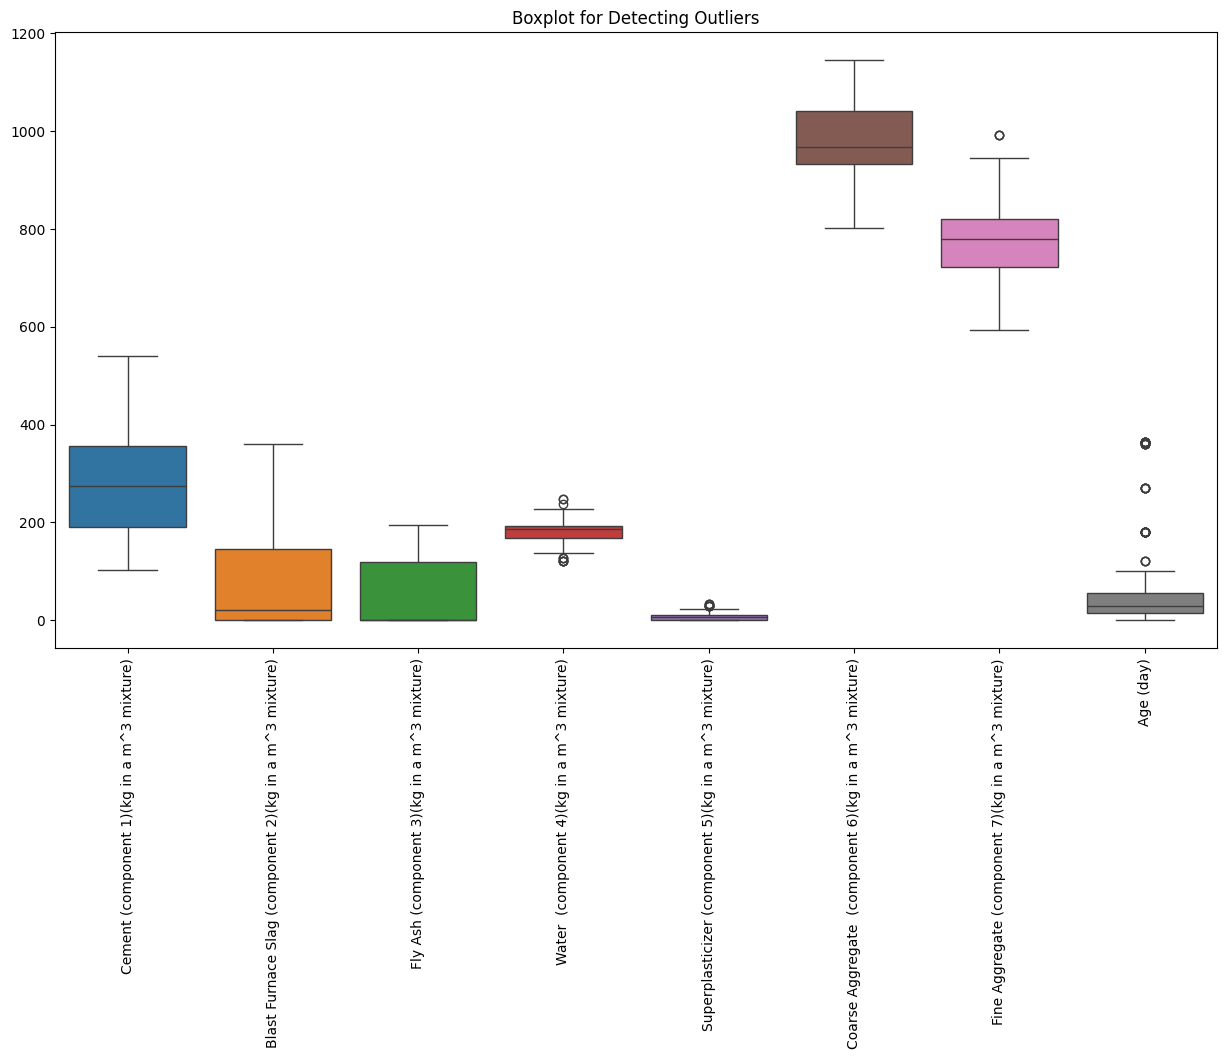

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.title("Boxplot for Detecting Outliers")
plt.show()

## Using IQR method find the outliers

In [ ]:
# Define a function to identify outliers using IQR
def detect_outliers_iqr(df_cleaned, threshold=1.5):
    outliers = {}
    for column in df_cleaned.columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outliers[column] = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)][column]
    return outliers

# Detect outliers
outliers = detect_outliers_iqr(df_cleaned)
print("\nOutliers detected in each column:")
for col, outlier_values in outliers.items():
    print(f"{col}: {len(outlier_values)} outliers")



Outliers detected in each column:
Cement (component 1)(kg in a m^3 mixture): 0 outliers
Blast Furnace Slag (component 2)(kg in a m^3 mixture): 0 outliers
Fly Ash (component 3)(kg in a m^3 mixture): 0 outliers
Water  (component 4)(kg in a m^3 mixture): 11 outliers
Superplasticizer (component 5)(kg in a m^3 mixture): 8 outliers
Coarse Aggregate  (component 6)(kg in a m^3 mixture): 0 outliers
Fine Aggregate (component 7)(kg in a m^3 mixture): 3 outliers
Age (day): 42 outliers
Concrete compressive strength(MPa, megapascals): 6 outliers


#Cap Outliers

In [ ]:
# Cap outliers at the lower and upper bounds
for col in df_cleaned.columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
    df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])


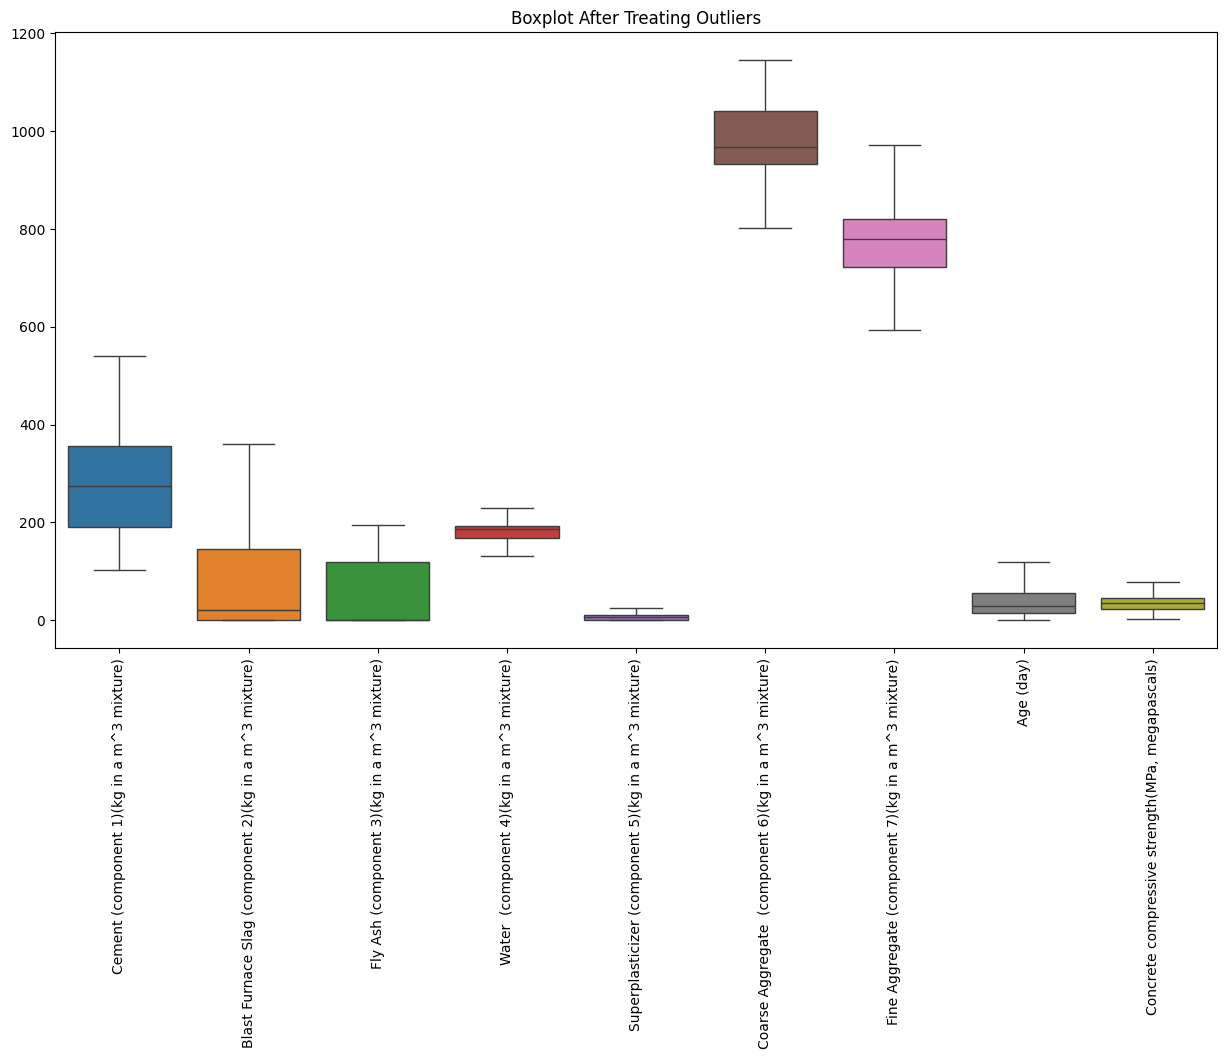

In [ ]:
# Boxplot to confirm outliers have been treated
plt.figure(figsize=(15,8))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.title("Boxplot After Treating Outliers")
plt.show()


In [ ]:
# Define features (X) and target (y)
X_train = df_cleaned.drop(columns=["Concrete compressive strength(MPa, megapascals)"])
y_train = df_cleaned["Concrete compressive strength(MPa, megapascals)"]


# Feature Scaling

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to a DataFrame for easier interpretation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

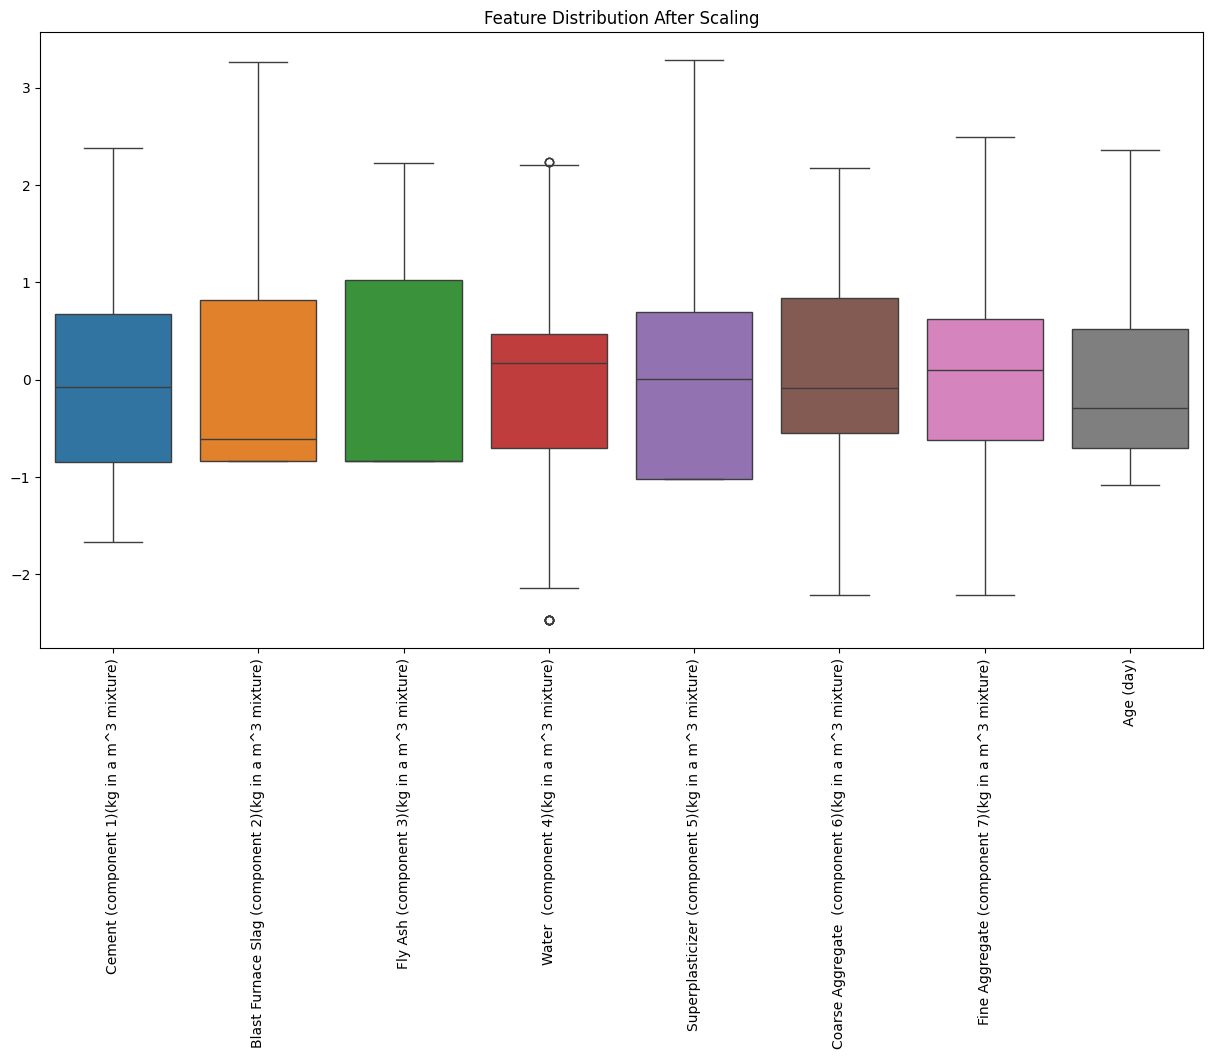

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train_scaled)
plt.xticks(rotation=90)
plt.title("Feature Distribution After Scaling")
plt.show()

# Linear Regression model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions on train and test data
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Performance evaluation
print("Linear Regression Performance:")

# Test data metrics
print(f"Test Mean Squared Error (MSE): {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"Test Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"Test R-squared (R2): {r2_score(y_test, y_test_pred):.4f}")

# Train data metrics
print(f"Train R-squared (R2): {r2_score(y_train, y_train_pred):.4f}")


Linear Regression Performance:
Test Mean Squared Error (MSE): 209.3159
Test Mean Absolute Error (MAE): 8.9749
Test R-squared (R2): 0.2264
Train R-squared (R2): 0.7289


# Hyperparameter tuning for Ridge and Lasso Regression

In [ ]:
# Hyperparameter tuning for Ridge and Lasso Regression
# Define parameter grid for alpha (regularization strength)
param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}


## Ridge Regression

In [ ]:
# Ridge Regression with GridSearchCV
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Best parameters and performance
print("\nRidge Regression:")
print(f"Best Alpha: {ridge_cv.best_params_['alpha']}")
print(f"Best Cross-validated MSE: {-ridge_cv.best_score_:.4f}")

# Predictions
ridge_best = ridge_cv.best_estimator_
y_train_pred_ridge = ridge_best.predict(X_train_scaled)
y_test_pred_ridge = ridge_best.predict(X_test_scaled)

# Evaluation metrics
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_ridge):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_test_pred_ridge):.4f}")
print(f"Test R-squared (R2): {r2_score(y_test, y_test_pred_ridge):.4f}")
print(f"Train R-squared (R2): {r2_score(y_train, y_train_pred_ridge):.4f}")


Ridge Regression:
Best Alpha: 1
Best Cross-validated MSE: 74.0119
Test MSE: 208.9338
Mean Absolute Error (MAE): 8.9764
Test R-squared (R2): 0.2278
Train R-squared (R2): 0.7289


## Lasso Regression

In [ ]:
# Lasso Regression with GridSearchCV
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train_scaled, y_train)

# Best parameters and performance
print("\nLasso Regression:")
print(f"Best Alpha: {lasso_cv.best_params_['alpha']}")
print(f"Best Cross-validated MSE: {-lasso_cv.best_score_:.4f}")

# Predictions
lasso_best = lasso_cv.best_estimator_
y_train_pred_lasso = lasso_best.predict(X_train_scaled)
y_test_pred_lasso = lasso_best.predict(X_test_scaled)

# Evaluation metrics
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_lasso):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_test_pred_lasso):.4f}")
print(f"Test R-squared (R2): {r2_score(y_test, y_test_pred_lasso):.4f}")
print(f"Train R-squared (R2): {r2_score(y_train, y_train_pred_lasso):.4f}")


Lasso Regression:
Best Alpha: 0.05
Best Cross-validated MSE: 73.8448
Test MSE: 207.9108
Mean Absolute Error (MAE): 8.9815
Test R-squared (R2): 0.2316
Train R-squared (R2): 0.7284


## Polynomial regression model


In [ ]:
# Adjusted Polynomial Degree
degree = 1  # Start with a low degree and increase if necessary

# Updated Parameter Grid for Regularization
param_grid = {
    'model__alpha': [0.01, 0.05, 0.1, 0.5, 1 , 5, 10 , 50, 100, 1000]  # Increase alpha to improve regularization
}


### Ridge Regression

In [ ]:
# Ridge Regression with Polynomial Features
ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', Ridge(max_iter=10000))
])

ridge_cv = GridSearchCV(ridge_pipeline, param_grid, scoring='r2', cv=5)
ridge_cv.fit(X_train, y_train)

# Best Ridge Model
best_ridge_model = ridge_cv.best_estimator_
y_train_pred_ridge = best_ridge_model.predict(X_train)
y_test_pred_ridge = best_ridge_model.predict(X_test)

print("\nRidge Regression with Polynomial Features:")
print(f"Best Alpha: {ridge_cv.best_params_['model__alpha']}")
print(f"Train R-squared (R2): {r2_score(y_train, y_train_pred_ridge):.4f}")
print(f"Test R-squared (R2): {r2_score(y_test, y_test_pred_ridge):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_ridge):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred_ridge):.4f}")


Ridge Regression with Polynomial Features:
Best Alpha: 5
Train R-squared (R2): 0.7284
Test R-squared (R2): 0.2333
Test MSE: 207.4497
Test MAE: 8.9832


### Lasso Regression

In [ ]:
# Lasso Regression with Polynomial Features
lasso_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', Lasso(max_iter=10000))
])

lasso_cv = GridSearchCV(lasso_pipeline, param_grid, scoring='r2', cv=5)
lasso_cv.fit(X_train, y_train)

# Best Lasso Model
best_lasso_model = lasso_cv.best_estimator_
y_train_pred_lasso = best_lasso_model.predict(X_train)
y_test_pred_lasso = best_lasso_model.predict(X_test)

print("\nLasso Regression with Polynomial Features:")
print(f"Best Alpha: {lasso_cv.best_params_['model__alpha']}")
print(f"Train R-squared (R2): {r2_score(y_train, y_train_pred_lasso):.4f}")
print(f"Test R-squared (R2): {r2_score(y_test, y_test_pred_lasso):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_lasso):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred_lasso):.4f}")


Lasso Regression with Polynomial Features:
Best Alpha: 0.05
Train R-squared (R2): 0.7284
Test R-squared (R2): 0.2316
Test MSE: 207.9108
Test MAE: 8.9815


# SVM model

In [ ]:
# Create a pipeline that standardizes the data then fits the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predict on train and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluate the model
print("SVM Regressor Performance:")

# Test metrics
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"Test R-squared (R2): {r2_score(y_test, y_test_pred):.4f}")

# Train metrics
print(f"Train R-squared (R2): {r2_score(y_train, y_train_pred):.4f}")

SVM Regressor Performance:
Test MSE: 95.3321
Mean Absolute Error (MAE): 7.5055
Test R-squared (R2): 0.6477
Train R-squared (R2): 0.7123


# Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
# Define parameter distributions for RandomizedSearchCV
param_distributions_svr = {
    'svr__C': uniform(0.1, 100),  # Continuous distribution between 0.1 and 100
    'svr__epsilon': uniform(0.01, 1),  # Continuous distribution between 0.01 and 1
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # List of possible kernels
    'svr__degree': randint(2, 5)  # Integer values between 2 and 4 (for 'poly' kernel)
}

# Initialize the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svr', SVR())                 # Support Vector Regressor
])

# Initialize RandomizedSearchCV
svr_random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions_svr,
    n_iter=50,  # Number of combinations to try
    scoring='neg_mean_squared_error',  # Scoring metric
    cv=3,                              # Cross-validation splits
    verbose=2,                         # Print progress updates
    random_state=42,                   # For reproducibility
    n_jobs=-1                          # Use all available cores
)

# Fit RandomizedSearchCV to the training data
svr_random_search.fit(X_train, y_train)

# Extract the best parameters and the best model
best_params_svr = svr_random_search.best_params_
best_svr_model = svr_random_search.best_estimator_

# Display best parameters and cross-validated MSE
print("Best Parameters:", best_params_svr)
print(f"Best Cross-validated MSE: {-svr_random_search.best_score_:.4f}")

# Evaluate the best model on the training and test data
y_train_pred_svr_tuned = best_svr_model.predict(X_train)
y_test_pred_svr_tuned = best_svr_model.predict(X_test)

# Metrics for test data
print("\nTest Performance of the Tuned SVR Model:")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_svr_tuned):.4f}")
print(f"Test Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_test_pred_svr_tuned):.4f}")
print(f"Test R-squared (R2): {r2_score(y_test, y_test_pred_svr_tuned):.4f}")

# Metrics for train data
print("\nTrain Performance of the Tuned SVR Model:")
print(f"Train R-squared (R2): {r2_score(y_train, y_train_pred_svr_tuned):.4f}")



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'svr__C': 59.36967238793935, 'svr__degree': 4, 'svr__epsilon': 0.7716196153287176, 'svr__kernel': 'rbf'}
Best Cross-validated MSE: 39.8818

Test Performance of the Tuned SVR Model:
Test MSE: 46.8227
Test Mean Absolute Error (MAE): 4.8109
Test R-squared (R2): 0.8270

Train Performance of the Tuned SVR Model:
Train R-squared (R2): 0.9362


# Hyperparameter Tuning with GridSearchCV

In [ ]:
# Define parameter grid for GridSearchCV
param_grid_svr = {
    'svr__C': [0.1, 1, 10, 50 , 70 , 76, 100],
    'svr__epsilon': [0.01, 0.1, 1, 10],
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__degree': [2, 3, 4]  # Only relevant for the 'poly' kernel
}

# Initialize the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svr', SVR())                 # Support Vector Regressor
])

# Initialize GridSearchCV
svr_grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_svr,
    scoring='neg_mean_squared_error',  # Scoring metric
    cv=3,                              # 3-fold cross-validation
    verbose=2,                         # Display progress updates
    n_jobs=-1                          # Use all available cores
)

# Fit GridSearchCV to the training data
svr_grid_search.fit(X_train, y_train)

# Extract the best parameters and the best model
best_params_svr = svr_grid_search.best_params_
best_svr_model = svr_grid_search.best_estimator_

# Display best parameters and cross-validated MSE
print("Best Parameters:", best_params_svr)
print(f"Best Cross-validated MSE: {-svr_grid_search.best_score_:.4f}")

# Evaluate the best model on the training data
y_pred_train = best_svr_model.predict(X_train)
train_r2 = r2_score(y_train, y_pred_train)

# Evaluate the best model on the test data
y_pred_test = best_svr_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)

# Display the R-squared values
print("\nModel Performance:")
print(f"Training R-squared (R2): {train_r2:.4f}")
print(f"Test R-squared (R2): {test_r2:.4f}")

# Additional evaluation metrics on the test data
print("\nTest Performance of the Tuned SVR Model:")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"Test R-squared (R2): {test_r2:.4f}")


Fitting 3 folds for each of 336 candidates, totalling 1008 fits
Best Parameters: {'svr__C': 76, 'svr__degree': 2, 'svr__epsilon': 1, 'svr__kernel': 'rbf'}
Best Cross-validated MSE: 39.2869

Model Performance:
Training R-squared (R2): 0.9420
Test R-squared (R2): 0.8264

Test Performance of the Tuned SVR Model:
Test MSE: 46.9657
Mean Absolute Error (MAE): 4.7485
Test R-squared (R2): 0.8264


# Random Forest Regressor model

In [ ]:
# Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions on the test data
y_pred_rf_test = rf.predict(X_test_scaled)

# Predictions on the training data (to calculate train R-squared)
y_pred_rf_train = rf.predict(X_train_scaled)

# Performance evaluation for Random Forest Regressor
print("Random Forest Regressor Performance:")

# Test Performance
print(f"Test MSE: {mean_squared_error(y_test, y_pred_rf_test):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_rf_test):.4f}")
print(f"Test R-squared (R2): {r2_score(y_test, y_pred_rf_test):.4f}")

# Train Performance
print(f"Train R-squared (R2): {r2_score(y_train, y_pred_rf_train):.4f}")


Random Forest Regressor Performance:
Test MSE: 32.2082
Test MAE: 3.9334
Test R-squared (R2): 0.8810
Train R-squared (R2): 0.9825


# Hyperparameter tuning

In [ ]:
# Define parameter grid for hyperparameters such as n_estimators and max_depth
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV with Random Forest model and the parameter grid
rf_cv = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model to the training data
rf_cv.fit(X_train_scaled, y_train)

# Best parameters and performance from GridSearchCV
print("\nRandom Forest Regressor Hyperparameter Tuning:")
print(f"Best Parameters: {rf_cv.best_params_}")
print(f"Best Cross-validated MSE: {-rf_cv.best_score_:.4f}")

# Predictions and evaluation with the best model
y_pred_rf_tuned_test = rf_cv.best_estimator_.predict(X_test_scaled)
y_pred_rf_tuned_train = rf_cv.best_estimator_.predict(X_train_scaled)

# Test Performance
print(f"Test MSE: {mean_squared_error(y_test, y_pred_rf_tuned_test):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_rf_tuned_test):.4f}")
print(f"Test R-squared (R2): {r2_score(y_test, y_pred_rf_tuned_test):.4f}")

# Train Performance
print(f"Train R-squared (R2): {r2_score(y_train, y_pred_rf_tuned_train):.4f}")


Random Forest Regressor Hyperparameter Tuning:
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-validated MSE: 28.8686
Test MSE: 25.8755
Test MAE: 3.2911
Test R-squared (R2): 0.9044
Train R-squared (R2): 0.9958


###  Plot learning curves

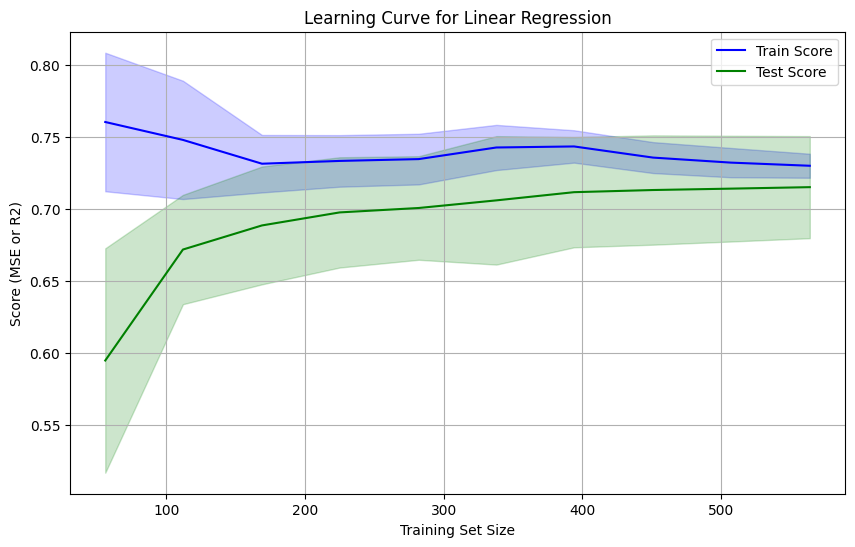

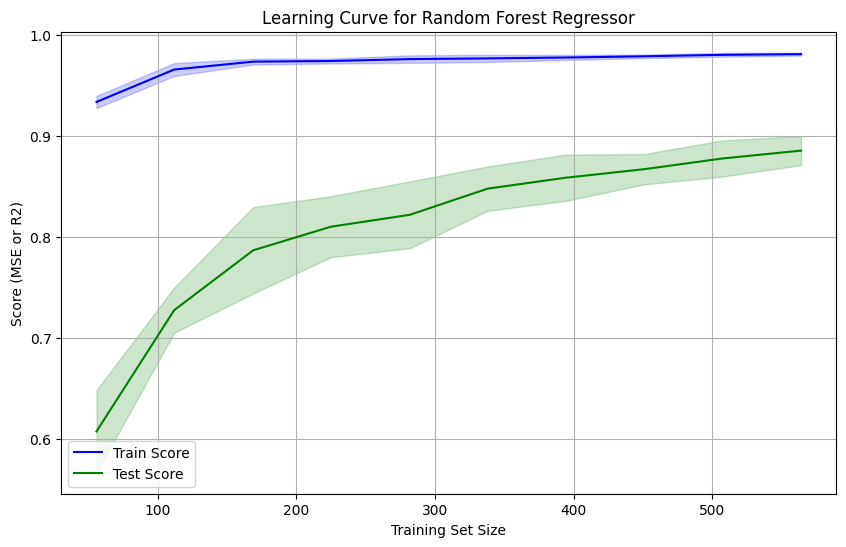

In [ ]:
# Define the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Function to plot learning curves
def plot_learning_curve(model, X, y, title="Learning Curve"):
    # Get learning curve data (train_sizes, train_scores, test_scores)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate the mean and standard deviation for train and test scores
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Train Score', color='blue')
    plt.plot(train_sizes, test_mean, label='Test Score', color='green')

    # Plot the shaded area for standard deviation
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Score (MSE or R2)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curve for Linear Regression
plot_learning_curve(lr_model, X_train_scaled, y_train, title="Learning Curve for Linear Regression")

# Plot learning curve for Random Forest Regression
plot_learning_curve(rf_model, X_train_scaled, y_train, title="Learning Curve for Random Forest Regressor")


In [ ]:
!jupyter nbconvert --to html "/content/EE5253Report__4675_4837_GP49.ipynb"

[NbConvertApp] Converting notebook /content/EE5253Report__4675_4837_GP49.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 3106824 bytes to /content/EE5253Report__4675_4837_GP49.html


# **Conclusion**

**Model Performance**


1.   Random Forest Regressor (Tuned) emerged as the best-performing model, achieving the lowest Mean Squared Error (MSE) and the highest R² score among all models. This highlights its capability to handle non-linear relationships and complex interactions between features.

2.   Models like Support Vector Regressor (SVR) and Ridge Regression performed reasonably well, but their accuracy was slightly lower compared to Random Forest.


**Feature Importance**



1.   Among the predictors, Cement Content and Age of Concrete were identified as the most significant features affecting compressive strength. This aligns with domain knowledge, as higher cement content and adequate curing time enhance concrete's strength.

2.   Water and Superplasticizer exhibited a moderate impact. Proper water-to-cement ratios and chemical additives play a crucial role in optimizing concrete strength.

**Impact of Regularization**



1.   Applying Ridge and Lasso Regression provided insights into the importance of penalizing coefficients to prevent overfitting. However, these models were slightly less effective for this dataset due to the inherent non-linear relationships.

2.   Regularization was useful in reducing overfitting but lacked the flexibility of tree-based models for capturing intricate patterns.

**Hyperparameter Tuning**



1.   Hyperparameter tuning significantly improved model performance, especially for Random Forest and SVR.

2.   For Random Forest, tuning parameters like the number of trees (n_estimators) and the maximum depth (max_depth) enhanced its predictive accuracy.


General Observations



1.   The right-skewed distribution of compressive strength suggests that the dataset contains more low-strength samples, which may require further data augmentation or stratification to improve model generalization

2.   Outlier detection and handling were crucial in ensuring the robustness of the models, as extreme values could skew results.


3.   Scaling input features improved the performance of models sensitive to feature magnitudes (e.g., SVR, Linear Regression).








